## Income risk estimates allowing for infrequent transitory shocks

### The basic facts on he monthly wage growth 

In [95]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [105]:
## configurations of plots
lw = 3
fontsize = 12

In [97]:
## SIPP data 
SIPP = pd.read_stata('../../../SIPP/sipp_matrix.dta',
                    convert_categoricals=False)   
SIPP.index = SIPP['uniqueid']
SIPP = SIPP.drop(['uniqueid'], axis=1)
SIPP = SIPP.dropna(axis=0,how='all')

In [124]:
SIPP['lwage_id_shk_gr201303'].iloc[1]

nan

In [99]:
def cdf_func(data):
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    return data_sorted,p

(-0.05, 0.05)

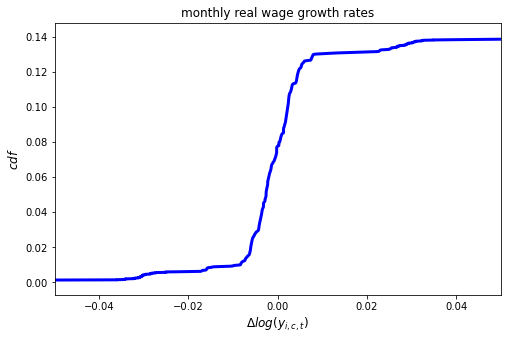

In [109]:
## for the whole sample 
group_by = ['educ','gender','age_5yr']
all_drop = group_by

## full sample 
sample_full =  SIPP.drop(all_drop,axis=1)
## income growth 
lw_gr = np.array(sample_full).flatten()
## get the cdf funcs 
x_sorted,cdfs = cdf_func(lw_gr)

# plot the data for the whole sample
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
ax1.plot(x_sorted,
         cdfs,
         'b-',
        lw=lw)
ax1.set_title('monthly real wage growth rates')
ax1.set_xlabel(r'$\Delta log(y_{i,c,t})$',fontsize=fontsize)
ax1.set_ylabel('$cdf$',fontsize=fontsize)
ax1.set_xlim(-0.05,0.05)

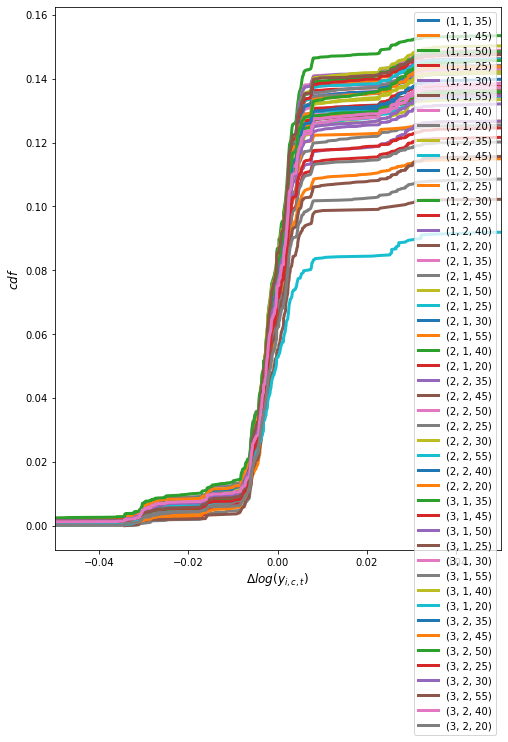

In [134]:
## different samples 

education_groups = [1, #'HS dropout',
                   2, # 'HS graduate',
                   3] #'college graduates/above'
gender_groups = [1, #'male',
                2] #'female'

#byear_groups = list(np.array(SIPP.byear_5yr.unique(),dtype='int32'))

age_groups = list(np.array(SIPP.age_5yr.unique(),dtype='int32'))

group_by = ['educ','gender','age_5yr']
all_drop = group_by #+['age_h','byear_5yr']


## sub sample 
sub_samples = []
para_est_list = []
sub_group_names = []

for edu in education_groups:
    for gender in gender_groups:
        for age5 in age_groups:
            belong = (SIPP['educ']==edu) & (SIPP['gender']==gender) & (SIPP['age_5yr']==age5)
            obs = np.sum(belong)
            #print(obs)
            if obs > 1:
                sample = SIPP.loc[belong].drop(all_drop,axis=1)
                sub_samples.append(sample)
                sub_group_names.append((edu,gender,age5))
                
                
fig = plt.figure(figsize=(8,10))
for i,sample in enumerate(sub_samples):
    ## estimation
    ## income growth 
    lw_gr = np.array(sample).flatten()
    ## get the cdf funcs 
    x_sorted,cdfs = cdf_func(lw_gr)

    # plot the data for the whole sample
    plt.plot(x_sorted,
             cdfs,
             lw=lw,
             label=sub_group_names[i])
    #ax1.set_title('monthly real wage growth rates')
plt.xlabel(r'$\Delta log(y_{i,c,t})$',fontsize=fontsize)
plt.ylabel('$cdf$',fontsize=fontsize)
plt.xlim(-0.05,0.05)
plt.legend(loc=1)